Matriz de confusión:
 [[29  0  0]
 [ 0 23  0]
 [ 0  1 22]]


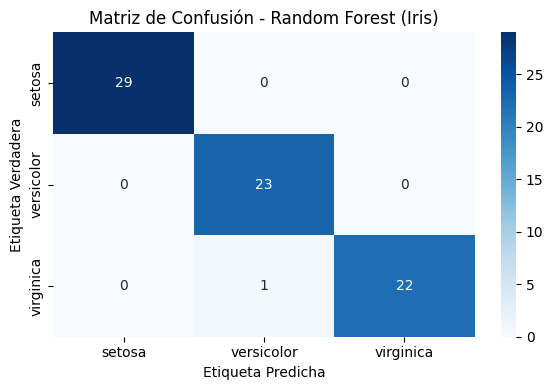


Reporte de Clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        29
  versicolor       0.96      1.00      0.98        23
   virginica       1.00      0.96      0.98        23

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



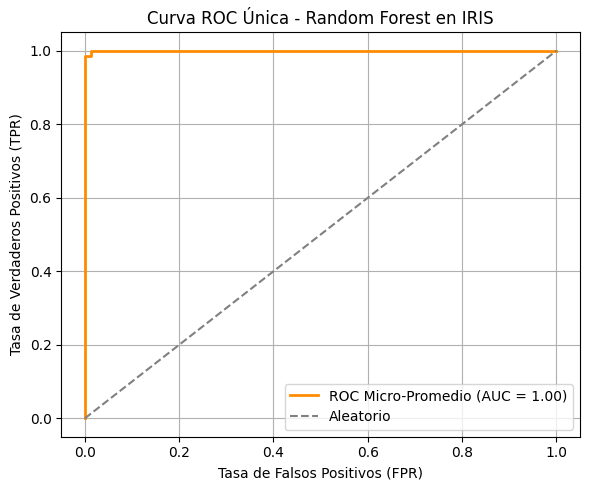

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Cargar datos
iris = load_iris()
X = iris.data
y = iris.target
y_bin = label_binarize(y, classes=[0, 1, 2])  # Binarizar etiquetas
n_classes = y_bin.shape[1]

# 2. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.5, random_state=42)

# 3. Entrenar modelo One-vs-Rest con Random Forest
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)

# 4. Convertir a etiquetas para matriz de confusión
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_score, axis=1)

# 5. Matriz de confusión
cm = confusion_matrix(y_test_labels, y_pred_labels)
print("Matriz de confusión:\n", cm)

# 6. Visualización
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.title("Matriz de Confusión - Random Forest (Iris)")
plt.tight_layout()
plt.show()

# 7. Reporte de clasificación
print("\nReporte de Clasificación:\n", classification_report(y_test_labels, y_pred_labels, target_names=iris.target_names))

# 8. Curvas ROC por clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 9. Curva ROC micro-promediada
import matplotlib.pyplot as plt

# Calcular curva ROC micro (acumulando todo como binario)
fpr_micro, tpr_micro, _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Graficar solo una curva ROC global
plt.figure(figsize=(6, 5))
plt.plot(fpr_micro, tpr_micro, color='darkorange',
         lw=2, label=f'ROC Micro-Promedio (AUC = {roc_auc_micro:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC Única - Random Forest en IRIS')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


# **Se puede visualizar?**

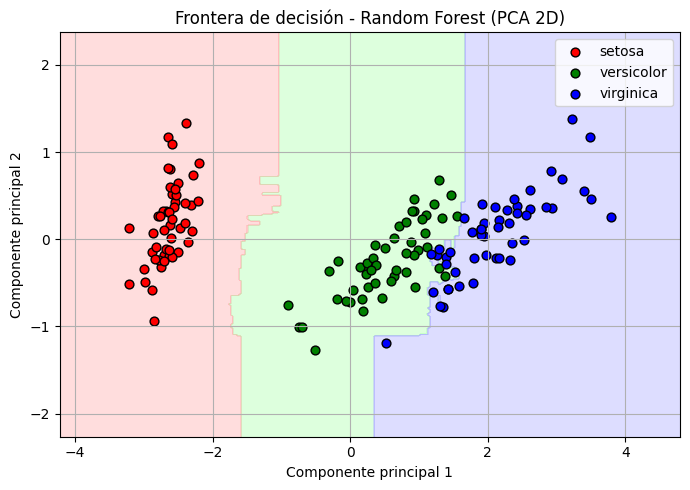

In [ ]:
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# 1. Reducir a 2D con PCA
pca = PCA(n_components=2)
#print(X)
X_reduced = pca.fit_transform(X)

# 2. Entrenar Random Forest solo con 2D para visualización
X_train_2d, X_test_2d, y_train_labels, y_test_labels = train_test_split(X_reduced, y, test_size=0.5, random_state=42)
rf_2d = RandomForestClassifier(n_estimators=100, random_state=42)
rf_2d.fit(X_train_2d, y_train_labels)

# 3. Crear malla para frontera
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = rf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 4. Visualizar
plt.figure(figsize=(7, 5))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.4)
for i, color in zip(range(3), cmap_bold):
    plt.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], label=iris.target_names[i],
                edgecolor='k', s=40, color=color)

plt.title("Frontera de decisión - Random Forest (PCA 2D)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
